In [1]:
#import library
import pandas as pd 
import numpy as np

In [137]:
#import imdb csv
csv_file = "douban_translated_revised.csv"
gapminder = pd.read_csv(csv_file)

In [138]:
print(type(gapminder))
gapminder.head()

<class 'pandas.core.frame.DataFrame'>


,Commental title,Review main body
0,"Space and symbol metaphor analysis of ""squid g...","(First, the public number: ___, welcome attent..."
1,I hate those reasonable comments,The game design in this TV series is a morphol...
2,"I am gambling horses, I don't work, I am old b...",The Father is the father of all beings. I was ...
3,"The man is not the Father, but fake, bad, not ...","After reading my biggest question, how can peo..."
4,Kong Liu fan Li Zheng slaughtered the result o...,"I as an example, let's talk about the plot and..."


In [139]:
gapminder.tail(5)

,Commental title,Review main body
1115,Poster,/
1116,"Looking forward, bigger, the bigger disappoint...",Maybe I look forward to it too much for this d...
1117,Details disclose distort,"The plot is dragged, several lenses against th..."
1118,"Everything is a ""human nature"" game.",SquidGame Squid Game Director Hwangdong-Hyuk s...
1119,Works that don't cover your job,About the male protagonist: I didn't expect th...


In [140]:
# check the attribute of database
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Commental title   1120 non-null   object
 1   Review main body  1120 non-null   object
dtypes: object(2)
memory usage: 17.6+ KB


In [141]:
#create df with review's title
df_titles = pd.DataFrame(gapminder['Commental title'], columns=["Commental title"])

In [142]:
df_titles.head()

,Commental title
0,"Space and symbol metaphor analysis of ""squid g..."
1,I hate those reasonable comments
2,"I am gambling horses, I don't work, I am old b..."
3,"The man is not the Father, but fake, bad, not ..."
4,Kong Liu fan Li Zheng slaughtered the result o...


In [143]:
# count the char and words of title
df_titles['char_count'] = df_titles['Commental title'].str.len()  ## this also includes spaces， count the number of words
df_titles['word_count'] = df_titles['Commental title'].apply(
    lambda ttl: len(str(ttl).split()))

df_titles

,Commental title,char_count,word_count
0,"Space and symbol metaphor analysis of ""squid g...",98,15
1,I hate those reasonable comments,32,5
2,"I am gambling horses, I don't work, I am old b...",75,18
3,"The man is not the Father, but fake, bad, not ...",63,12
4,Kong Liu fan Li Zheng slaughtered the result o...,68,13
...,...,...,...
1115,Poster,6,1
1116,"Looking forward, bigger, the bigger disappoint...",50,6
1117,Details disclose distort,24,3
1118,"Everything is a ""human nature"" game.",36,6


In [144]:
# drop nan
df_titles = df_titles[ ~ df_titles['Commental title'].str.contains('NAN') ]

In [145]:
df_titles

,Commental title,char_count,word_count
0,"Space and symbol metaphor analysis of ""squid g...",98,15
1,I hate those reasonable comments,32,5
2,"I am gambling horses, I don't work, I am old b...",75,18
3,"The man is not the Father, but fake, bad, not ...",63,12
4,Kong Liu fan Li Zheng slaughtered the result o...,68,13
...,...,...,...
1115,Poster,6,1
1116,"Looking forward, bigger, the bigger disappoint...",50,6
1117,Details disclose distort,24,3
1118,"Everything is a ""human nature"" game.",36,6


In [146]:
# converting all letters to lower case
# lambda ttl: " ".join(word.lower() for word in ttl.split())

df_titles['Commental title'] = df_titles['Commental title'].apply(
    lambda ttl: " ".join(wrd.lower() for wrd in ttl.split()))
df_titles['Commental title'].head()

0    space and symbol metaphor analysis of "squid g...
1                     i hate those reasonable comments
2    i am gambling horses, i don't work, i am old b...
3    the man is not the father, but fake, bad, not ...
4    kong liu fan li zheng slaughtered the result o...
Name: Commental title, dtype: object

In [147]:
# removing all punctuations, which are specified with regular expression "[^\w\s]"

df_titles['Commental title'] = df_titles['Commental title'].str.replace('[^\w\s]', '')
df_titles['Commental title'].head()

# replace pountuation to nothing

/var/folders/_y/lzqhs5394mz4mb9gx_dgt6vw0000gn/T/ipykernel_17747/753040296.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_titles['Commental title'] = df_titles['Commental title'].str.replace('[^\w\s]', '')


0    space and symbol metaphor analysis of squid ga...
1                     i hate those reasonable comments
2    i am gambling horses i dont work i am old but ...
3    the man is not the father but fake bad not sel...
4    kong liu fan li zheng slaughtered the result o...
Name: Commental title, dtype: object

In [151]:
squid=['squid','game']

In [152]:
# def func to remove "squid", "game"

df_titles['Commental title'] = df_titles['Commental title'].apply(
    lambda ttl: " ".join(wrd for wrd in ttl.split() if wrd not in squid))
df_titles['Commental title'].head()

0    space and symbol metaphor analysis of social r...
1                     i hate those reasonable comments
2    i am gambling horses i dont work i am old but ...
3    the man is not the father but fake bad not sel...
4    kong liu fan li zheng slaughtered the result o...
Name: Commental title, dtype: object

In [154]:
#create df with review

df_reviews = pd.DataFrame(gapminder['Review main body'], columns=["Review main body"])


In [155]:
df_reviews.head()

,Review main body
0,"(First, the public number: ___, welcome attent..."
1,The game design in this TV series is a morphol...
2,The Father is the father of all beings. I was ...
3,"After reading my biggest question, how can peo..."
4,"I as an example, let's talk about the plot and..."


In [156]:
df_reviews.dropna

<bound method DataFrame.dropna of                                        Review main body
0     (First, the public number: ___, welcome attent...
1     The game design in this TV series is a morphol...
2     The Father is the father of all beings. I was ...
3     After reading my biggest question, how can peo...
4     I as an example, let's talk about the plot and...
...                                                 ...
1115                                                  /
1116  Maybe I look forward to it too much for this d...
1117  The plot is dragged, several lenses against th...
1118  SquidGame Squid Game Director Hwangdong-Hyuk s...
1119  About the male protagonist: I didn't expect th...

[1120 rows x 1 columns]>

In [157]:
# count the char and words of title
df_reviews['char_count'] = df_reviews['Review main body'].str.len()  ## this also includes spaces， count the number of words
df_reviews['word_count'] = df_reviews['Review main body'].apply(
    lambda ttl: len(str(ttl).split()))

df_reviews

,Review main body,char_count,word_count
0,"(First, the public number: ___, welcome attent...",368,56
1,The game design in this TV series is a morphol...,408,76
2,The Father is the father of all beings. I was ...,453,84
3,"After reading my biggest question, how can peo...",435,79
4,"I as an example, let's talk about the plot and...",452,83
...,...,...,...
1115,/,1,1
1116,Maybe I look forward to it too much for this d...,388,73
1117,"The plot is dragged, several lenses against th...",417,74
1118,SquidGame Squid Game Director Hwangdong-Hyuk s...,446,69


In [158]:
# drop nan
df_reviews = df_reviews[ ~ df_reviews['Review main body'].str.contains('NAN',na=False) ]

In [159]:
#drop "nan"
searchfor = ['NAN', 'NaN']
df_reviews = df_reviews[~df_reviews['Review main body'].str.contains('|'.join(searchfor),na=False)]

In [160]:
df_reviews

,Review main body,char_count,word_count
0,"(First, the public number: ___, welcome attent...",368,56
1,The game design in this TV series is a morphol...,408,76
2,The Father is the father of all beings. I was ...,453,84
3,"After reading my biggest question, how can peo...",435,79
4,"I as an example, let's talk about the plot and...",452,83
...,...,...,...
1115,/,1,1
1116,Maybe I look forward to it too much for this d...,388,73
1117,"The plot is dragged, several lenses against th...",417,74
1118,SquidGame Squid Game Director Hwangdong-Hyuk s...,446,69


In [161]:
df_reviews = df_reviews.drop(df_reviews[df_reviews['word_count']==1].index)

In [162]:
df_reviews

,Review main body,char_count,word_count
0,"(First, the public number: ___, welcome attent...",368,56
1,The game design in this TV series is a morphol...,408,76
2,The Father is the father of all beings. I was ...,453,84
3,"After reading my biggest question, how can peo...",435,79
4,"I as an example, let's talk about the plot and...",452,83
...,...,...,...
1113,_____. (Squid game) a total of nine episodes i...,426,78
1116,Maybe I look forward to it too much for this d...,388,73
1117,"The plot is dragged, several lenses against th...",417,74
1118,SquidGame Squid Game Director Hwangdong-Hyuk s...,446,69


In [163]:
# converting all letters to lower case
# lambda ttl: " ".join(word.lower() for word in ttl.split())

df_reviews['Review main body'] = df_reviews['Review main body'].apply(
    lambda ttl: " ".join(wrd.lower() for wrd in ttl.split()))
df_reviews['Review main body'].head()

0    (first, the public number: ___, welcome attent...
1    the game design in this tv series is a morphol...
2    the father is the father of all beings. i was ...
3    after reading my biggest question, how can peo...
4    i as an example, let's talk about the plot and...
Name: Review main body, dtype: object

In [164]:
# removing all punctuations, which are specified with regular expression "[^\w\s]"

df_reviews['Review main body'] = df_reviews['Review main body'].str.replace('[^\w\s]', '')
df_reviews['Review main body'].head()

# replace pountuation to nothing

/var/folders/_y/lzqhs5394mz4mb9gx_dgt6vw0000gn/T/ipykernel_17747/1023243587.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_reviews['Review main body'] = df_reviews['Review main body'].str.replace('[^\w\s]', '')


0    first the public number ___ welcome attention ...
1    the game design in this tv series is a morphol...
2    the father is the father of all beings i was o...
3    after reading my biggest question how can peop...
4    i as an example lets talk about the plot and t...
Name: Review main body, dtype: object

In [165]:
# def func to drop "squid game"

df_reviews['Review main body']  = df_reviews['Review main body'] .apply(
    lambda ttl: " ".join(wrd for wrd in ttl.split() if wrd not in squid))
df_reviews['Review main body'] .head()

0    first the public number ___ welcome attention ...
1    the design in this tv series is a morphologica...
2    the father is the father of all beings i was o...
3    after reading my biggest question how can peop...
4    i as an example lets talk about the plot and t...
Name: Review main body, dtype: object

In [166]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kawanwong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [167]:
# removing stop words

from nltk.corpus import stopwords

stop = stopwords.words('english')

In [168]:
# show stopwords
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [169]:
# def func

df_titles['Commental title'] = df_titles['Commental title'].apply(
    lambda ttl: " ".join(wrd for wrd in ttl.split() if wrd not in stop))
df_titles['Commental title'].head()

0    space symbol metaphor analysis social rules co...
1                             hate reasonable comments
2       gambling horses dont work old know good father
3                    man father fake bad selfknowledge
4    kong liu fan li zheng slaughtered result ear f...
Name: Commental title, dtype: object

In [170]:
#df_reviews['Review main body'']
df_reviews['Review main body'] = df_reviews['Review main body'].apply(
    lambda ttl: " ".join(wrd for wrd in ttl.split() if wrd not in stop))
df_reviews['Review main body'].head()

0    first public number ___ welcome attention use ...
1    design tv series morphological change real wor...
2    father father beings originally wow net flight...
3    reading biggest question people man highlighte...
4    example lets talk plot scenery see drama hands...
Name: Review main body, dtype: object

In [171]:
string = ' '.join(df_titles['Commental title'])
string

'space symbol metaphor analysis social rules concentrated human nature hate reasonable comments gambling horses dont work old know good father man father fake bad selfknowledge kong liu fan li zheng slaughtered result ear fan unwaken discover first 8 episodes exciting 9th episode doramen want take little bad makeup far ordinary people evil words plagiarism latcoma desire theory head greater content treatment time world world net fly finally ï ïö successful entry dating method children adults color symbols games severe spoiler cautious reality hell big escape long mens story live episodes mens looks frown backbound second episode exposes ending protagonist personal guess directors intention curious necessary directly escape model may saved drama survival humanity decrypt red man organization micro _ like amazing disappointment 5 sentences summary drama director tell us also believe people three conjectures games childlike hell net brush screen 19 banned new drama saw adrenaline madness 

In [172]:
string2 = ' '.join(df_reviews['Review main body'])
string2

'first public number ___ welcome attention use contrast form tension space metaphor chu gates world compare works murderous games 6 design pediatrics children play twothree wood people buckle cake tugofwar marble overwood bridge pediatric games become horrible design tv series morphological change real world every time everyone emphasizing people numbers people symbols people real people think emphasizes fear become say numbers africas corner passed river bite neck crocodile father father beings originally wow net flight korea play bottom line fight looking forward expectation knows little bit also necessary shoot second department male master made ten years strike incident understand dont accept wisdom wife accompanied wife actually accompanying coma reading biggest question people man highlighter drama last socalled believe people nine episodes statement point first male owner good thinks participate although also matter feeding cats take character male compared mans mother daughters

In [173]:
lst = string.split()
lst

['space',
 'symbol',
 'metaphor',
 'analysis',
 'social',
 'rules',
 'concentrated',
 'human',
 'nature',
 'hate',
 'reasonable',
 'comments',
 'gambling',
 'horses',
 'dont',
 'work',
 'old',
 'know',
 'good',
 'father',
 'man',
 'father',
 'fake',
 'bad',
 'selfknowledge',
 'kong',
 'liu',
 'fan',
 'li',
 'zheng',
 'slaughtered',
 'result',
 'ear',
 'fan',
 'unwaken',
 'discover',
 'first',
 '8',
 'episodes',
 'exciting',
 '9th',
 'episode',
 'doramen',
 'want',
 'take',
 'little',
 'bad',
 'makeup',
 'far',
 'ordinary',
 'people',
 'evil',
 'words',
 'plagiarism',
 'latcoma',
 'desire',
 'theory',
 'head',
 'greater',
 'content',
 'treatment',
 'time',
 'world',
 'world',
 'net',
 'fly',
 'finally',
 'ï',
 'ïö',
 'successful',
 'entry',
 'dating',
 'method',
 'children',
 'adults',
 'color',
 'symbols',
 'games',
 'severe',
 'spoiler',
 'cautious',
 'reality',
 'hell',
 'big',
 'escape',
 'long',
 'mens',
 'story',
 'live',
 'episodes',
 'mens',
 'looks',
 'frown',
 'backbound',
 's

In [174]:
lst2 = string2.split()
lst2

['first',
 'public',
 'number',
 '___',
 'welcome',
 'attention',
 'use',
 'contrast',
 'form',
 'tension',
 'space',
 'metaphor',
 'chu',
 'gates',
 'world',
 'compare',
 'works',
 'murderous',
 'games',
 '6',
 'design',
 'pediatrics',
 'children',
 'play',
 'twothree',
 'wood',
 'people',
 'buckle',
 'cake',
 'tugofwar',
 'marble',
 'overwood',
 'bridge',
 'pediatric',
 'games',
 'become',
 'horrible',
 'design',
 'tv',
 'series',
 'morphological',
 'change',
 'real',
 'world',
 'every',
 'time',
 'everyone',
 'emphasizing',
 'people',
 'numbers',
 'people',
 'symbols',
 'people',
 'real',
 'people',
 'think',
 'emphasizes',
 'fear',
 'become',
 'say',
 'numbers',
 'africas',
 'corner',
 'passed',
 'river',
 'bite',
 'neck',
 'crocodile',
 'father',
 'father',
 'beings',
 'originally',
 'wow',
 'net',
 'flight',
 'korea',
 'play',
 'bottom',
 'line',
 'fight',
 'looking',
 'forward',
 'expectation',
 'knows',
 'little',
 'bit',
 'also',
 'necessary',
 'shoot',
 'second',
 'department

In [175]:
srs = pd.Series(lst)
srs

0          space
1         symbol
2       metaphor
3       analysis
4         social
          ...   
4158      nature
4159       works
4160        dont
4161       cover
4162         job
Length: 4163, dtype: object

In [176]:
srs2 = pd.Series(lst2)
srs2

0           first
1          public
2          number
3             ___
4         welcome
           ...   
25038         one
25039     biggest
25040    problems
25041       drama
25042       theme
Length: 25043, dtype: object

In [177]:
srs.value_counts()

drama           62
people          56
good            52
life            44
humanity        43
                ..
marketshaped     1
yig              1
blocked          1
message          1
job              1
Length: 1695, dtype: int64

In [178]:
srs2.value_counts()

people       456
_            363
drama        325
first        208
also         176
            ... 
frame          1
malan          1
blossoms       1
twentyone      1
conveyed       1
Length: 4906, dtype: int64

In [179]:
# common word screening (can determine to remove these words or not)
freq_common = srs.value_counts()[:10]

In [180]:
freq_common_2 = srs2.value_counts()[:10]

In [181]:
# equivalent to 
freq_common = pd.Series(' '.join(
    df_titles['Commental title']).split()).value_counts()[:20]
freq_common
# df_titles['titles']).split()).value_counts()[-10] :last 10
# let's retain them for this example

drama       62
people      56
good        52
life        44
humanity    43
dont        42
human       42
male        33
man         32
korean      30
games       29
want        28
film        26
cant        23
world       23
one         21
see         20
evil        20
nature      20
big         19
dtype: int64

In [182]:
# equivalent to 
freq_common_2 = pd.Series(' '.join(
    df_reviews['Review main body']).split()).value_counts()[:20]
freq_common_2
# df_titles['titles']).split()).value_counts()[-10] :last 10
# let's retain them for this example

people    456
_         363
drama     325
first     208
also      176
good      167
dont      164
male      155
man       145
games     137
one       136
really    132
big       124
korean    124
see       123
like      122
old       120
life      118
still     116
1         115
dtype: int64

In [183]:
# rare words removal
freq_rare = pd.Series(' '.join(
    df_titles['Commental title']).split()).value_counts()[-10:]
freq_rare

# not bad. let's retain them for this example

successfully    1
ice             1
hours           1
blinded         1
cjb             1
marketshaped    1
yig             1
blocked         1
message         1
job             1
dtype: int64

In [184]:
# rare words removal
freq_rare_2 = pd.Series(' '.join(
    df_reviews['Review main body']).split()).value_counts()[-10:]
freq_rare_2

# not bad. let's retain them for this example

screws       1
tag          1
rubber       1
band         1
leather      1
frame        1
malan        1
blossoms     1
twentyone    1
conveyed     1
dtype: int64

In [185]:
# removing non-English characters


def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i) < 128)


df_titles['Commental title'] = df_titles['Commental title'].apply(remove_non_ascii)

In [186]:
# removing non-English characters


def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i) < 128)


df_reviews['Review main body'] = df_reviews['Review main body'].apply(remove_non_ascii)

In [187]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [188]:
# tokenization - 分词
# It is the process of a converting a text in tokens(words or entities 
# present in the text) as it becomes easy to perform the other preprocessing steps.

from textblob import TextBlob

TextBlob(df_titles['Commental title'][0]).words

WordList(['space', 'symbol', 'metaphor', 'analysis', 'social', 'rules', 'concentrated', 'human', 'nature'])

In [189]:
df_reviews['Review main body']

0       first public number ___ welcome attention use ...
1       design tv series morphological change real wor...
2       father father beings originally wow net flight...
3       reading biggest question people man highlighte...
4       example lets talk plot scenery see drama hands...
                              ...                        
1113    _____ total nine episodes first quarter readin...
1116    maybe look forward much drama really like dram...
1117    plot dragged several lenses antiswift logic se...
1118    squidgame director hwangdonghyuk story introdu...
1119    male protagonist didnt expect someone move dir...
Name: Review main body, Length: 664, dtype: object

In [190]:
# TF
tf1 = df_titles['Commental title'].apply(lambda x: pd.value_counts(x.split(" "))).sum(
    axis=0).reset_index()

tf1.columns = ['words', 'tf']
tf1.sort_values(['tf'], ascending=False).head(20)

,words,tf
60,,77.0
101,drama,62.0
47,people,56.0
18,good,52.0
136,life,44.0
103,humanity,43.0
14,dont,42.0
7,human,42.0
257,male,33.0
20,man,32.0


In [191]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [192]:
# Import the required libraries
from nltk.corpus import movie_reviews

# Load positive and negative reviews  
import nltk
nltk.download('movie_reviews')

# get all positive and negative file ids
positive_fileids = movie_reviews.fileids('pos')
negative_fileids = movie_reviews.fileids('neg')

# display the words in a positive review
movie_reviews.words('pos/cv004_11636.txt')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/kawanwong/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


['moviemaking', 'is', 'a', 'lot', 'like', 'being', ...]

In [193]:
# Define a function to extract features. It returns a dictionary containing all words in a
# document as keys and 'True' for their values
def extract_features(word_list):
    return dict([(word, True) for word in word_list])

# Extract features for the positive and negative reviews
features_positive = [(extract_features(movie_reviews.words(fileids=[f])),
                      'Positive') for f in positive_fileids]
features_negative = [(extract_features(movie_reviews.words(fileids=[f])),
                      'Negative') for f in negative_fileids]

# Take a look at an input feature
print(features_positive[10])


({'after': True, 'watching': True, '"': True, 'rat': True, 'race': True, 'last': True, 'week': True, ',': True, 'i': True, 'noticed': True, 'my': True, 'cheeks': True, 'were': True, 'sore': True, 'and': True, 'realized': True, 'that': True, 'when': True, 'not': True, 'laughing': True, 'aloud': True, 'had': True, 'held': True, 'a': True, 'grin': True, 'for': True, 'virtually': True, 'all': True, 'of': True, 'the': True, 'film': True, "'": True, 's': True, '112': True, 'minutes': True, '.': True, 'saturday': True, 'night': True, 'attended': True, 'another': True, 'sneak': True, 'preview': True, 'movie': True, 'damned': True, 'if': True, 'didn': True, 't': True, 'enjoy': True, 'it': True, 'as': True, 'much': True, 'second': True, 'time': True, 'first': True, 'is': True, 'great': True, 'goofy': True, 'delight': True, 'dandy': True, 'mix': True, 'energetic': True, 'performances': True, 'inspired': True, 'sight': True, 'gags': True, 'flat': True, '-': True, 'out': True, 'silliness': True, 'h

In [194]:
print(features_negative[10])

({'best': True, 'remembered': True, 'for': True, 'his': True, 'understated': True, 'performance': True, 'as': True, 'dr': True, '.': True, 'hannibal': True, 'lecter': True, 'in': True, 'michael': True, 'mann': True, "'": True, 's': True, 'forensics': True, 'thriller': True, ',': True, 'manhunter': True, 'scottish': True, 'character': True, 'actor': True, 'brian': True, 'cox': True, 'brings': True, 'something': True, 'special': True, 'to': True, 'every': True, 'movie': True, 'he': True, 'works': True, 'on': True, 'usually': True, 'playing': True, 'a': True, 'bit': True, 'role': True, 'some': True, 'studio': True, 'schlock': True, '(': True, 'dies': True, 'halfway': True, 'through': True, 'the': True, 'long': True, 'kiss': True, 'goodnight': True, ')': True, 'only': True, 'occasionally': True, 'given': True, 'meaty': True, 'and': True, 'substantial': True, 'do': True, 'if': True, 'you': True, 'want': True, 'see': True, 'brilliant': True, 'acting': True, 'check': True, 'out': True, 'work'

In [195]:
#Split the data into train and test in an 80-20 ratio. W
threshold_factor = 0.8

threshold_positive = int(threshold_factor * len(features_positive))
threshold_negative = int(threshold_factor * len(features_negative))

In [196]:
# Extract the features for training and test data
features_train = features_positive[:threshold_positive] + features_negative[:threshold_negative]
features_test = features_positive[threshold_positive:] + features_negative[threshold_negative:]  

print("Number of training datapoints:", len(features_train))
print("Number of test datapoints:", len(features_test))

Number of training datapoints: 1600
Number of test datapoints: 400


In [197]:
# Import the required libraries
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier

# Train a Naive Bayes classifier
clf = NaiveBayesClassifier.train(features_train)

# Display the accuracy using the test data only
print("Accuracy of the classifier:", nltk.classify.util.accuracy(clf, features_test))

Accuracy of the classifier: 0.735


In [198]:
# Display the 10 most informative words that it obtained during analysis.
# These words basically have a strong say in what’s classified as a positive or a negative review.
print("Top 10 most informative words:")
print()

for item in clf.most_informative_features()[:10]:
    print(item[0])

Top 10 most informative words:

outstanding
insulting
vulnerable
ludicrous
uninvolving
astounding
avoids
fascination
affecting
animators


In [199]:
# In order to see how our classifier performs, let's put some unseen reviews
# into our classifier and see how the classifier processes them

input_reviews = df_titles['Commental title']

In [200]:
input_reviews_co= df_reviews['Review main body']

In [201]:
df_titles

,Commental title,char_count,word_count
0,space symbol metaphor analysis social rules co...,98,15
1,hate reasonable comments,32,5
2,gambling horses dont work old know good father,75,18
3,man father fake bad selfknowledge,63,12
4,kong liu fan li zheng slaughtered result ear f...,68,13
...,...,...,...
1115,poster,6,1
1116,looking forward bigger bigger disappointment,50,6
1117,details disclose distort,24,3
1118,everything human nature,36,6


In [202]:
df_reviews

,Review main body,char_count,word_count
0,first public number ___ welcome attention use ...,368,56
1,design tv series morphological change real wor...,408,76
2,father father beings originally wow net flight...,453,84
3,reading biggest question people man highlighte...,435,79
4,example lets talk plot scenery see drama hands...,452,83
...,...,...,...
1113,_____ total nine episodes first quarter readin...,426,78
1116,maybe look forward much drama really like dram...,388,73
1117,plot dragged several lenses antiswift logic se...,417,74
1118,squidgame director hwangdonghyuk story introdu...,446,69


In [203]:
print("Predictions:")
for review in input_reviews:
    
    print("Review:", review)
    probdist = clf.prob_classify(extract_features(review.split()))
    pred_sentiment = probdist.max()
    # Step 11: Print the output:
    print("Predicted sentiment:", pred_sentiment)
    
    print("Probability:", round(probdist.prob(pred_sentiment), 2))
    

Predictions:
Review: space symbol metaphor analysis social rules concentrated human nature
Predicted sentiment: Positive
Probability: 1.0
Review: hate reasonable comments
Predicted sentiment: Negative
Probability: 0.61
Review: gambling horses dont work old know good father
Predicted sentiment: Negative
Probability: 0.63
Review: man father fake bad selfknowledge
Predicted sentiment: Negative
Probability: 0.73
Review: kong liu fan li zheng slaughtered result ear fan unwaken
Predicted sentiment: Negative
Probability: 0.96
Review: discover
Predicted sentiment: Negative
Probability: 0.51
Review: first 8 episodes exciting 9th episode doramen
Predicted sentiment: Positive
Probability: 0.8
Review: want take little bad makeup
Predicted sentiment: Negative
Probability: 0.71
Review: far ordinary people evil
Predicted sentiment: Positive
Probability: 0.82
Review: words plagiarism
Predicted sentiment: Positive
Probability: 0.53
Review: latcoma desire theory
Predicted sentiment: Positive
Probability

Review: xi ba black black inexhaustible
Predicted sentiment: Positive
Probability: 0.51
Review: good one pit
Predicted sentiment: Negative
Probability: 0.69
Review: never seen
Predicted sentiment: Positive
Probability: 0.58
Review: 
Predicted sentiment: Positive
Probability: 0.5
Review: humanity evil good
Predicted sentiment: Positive
Probability: 0.61
Review: instrument bloody era
Predicted sentiment: Positive
Probability: 0.85
Review: analysis group consciousness fire
Predicted sentiment: Positive
Probability: 0.7
Review: survival class competition
Predicted sentiment: Positive
Probability: 0.72
Review: win lose heart
Predicted sentiment: Positive
Probability: 0.63
Review: greed root evil
Predicted sentiment: Positive
Probability: 0.63
Review: seeing last episode understand
Predicted sentiment: Positive
Probability: 0.63
Review: capital humanity games
Predicted sentiment: Positive
Probability: 0.54
Review: individual feel
Predicted sentiment: Positive
Probability: 0.69
Review: phenom

Predicted sentiment: Positive
Probability: 0.56
Review: global phenomenon tv series opening half dead give jacksu
Predicted sentiment: Negative
Probability: 0.66
Review: think really ugly film
Predicted sentiment: Negative
Probability: 0.59
Review: good work god
Predicted sentiment: Negative
Probability: 0.51
Review: mens strange people
Predicted sentiment: Positive
Probability: 0.62
Review: symbolism life social epitomes
Predicted sentiment: Positive
Probability: 0.75
Review: stay late
Predicted sentiment: Negative
Probability: 0.53
Review: much symbolism wonder cant introduce
Predicted sentiment: Negative
Probability: 0.79
Review: small smart discipline big wisdom
Predicted sentiment: Positive
Probability: 0.74
Review: jump passing middle
Predicted sentiment: Negative
Probability: 0.63
Review: 
Predicted sentiment: Positive
Probability: 0.5
Review: human nature evil
Predicted sentiment: Positive
Probability: 0.72
Review: one person knows live kind life character articles 067 jiang xi

In [204]:
print("Predictions:")
for review in input_reviews_co:
    
    print("Review:", review)
    probdist = clf.prob_classify(extract_features(review.split()))
    pred_sentiment = probdist.max()
    # Step 11: Print the output:
    print("Predicted sentiment:", pred_sentiment)
    
    print("Probability:", round(probdist.prob(pred_sentiment), 2))

Predictions:
Review: first public number ___ welcome attention use contrast form tension space metaphor chu gates world compare works murderous games 6 design pediatrics children play twothree wood people buckle cake tugofwar marble overwood bridge pediatric games become horrible
Predicted sentiment: Positive
Probability: 1.0
Review: design tv series morphological change real world every time everyone emphasizing people numbers people symbols people real people think emphasizes fear become say numbers africas corner passed river bite neck crocodile
Predicted sentiment: Positive
Probability: 1.0
Review: father father beings originally wow net flight korea play bottom line fight looking forward expectation knows little bit also necessary shoot second department male master made ten years strike incident understand dont accept wisdom wife accompanied wife actually accompanying coma
Predicted sentiment: Negative
Probability: 0.79
Review: reading biggest question people man highlighter dram

Review: havent seriously chase drama long time although full comments havent seen drama seen play first episodes really good episode nervous protagonist also good feels little bit bad behind also reflects complexity human nature simply talk feelings 1 vulnerable roles human movies
Predicted sentiment: Positive
Probability: 1.0
Review: dont say thinking heart moment large scale entertainment circle biggest bigger entrepreneur loves watch movies dont love gossip think seen big escape series movies probacity hate core theme
Predicted sentiment: Positive
Probability: 0.92
Review: reading new comments difference central thinking talk human victory bigger opinion piece tells truth dont touch gambling person humanity lose humanity gambling order prove several stories segmented layers tell male bought horses mothers money male killing glass ball old friend knows
Predicted sentiment: Positive
Probability: 0.91
Review: going get last win winner crown clothing beasts fulltime loss jieji highly ri

Review: plot dragged several lenses antiswift logic selfcontained focus focus details detail 1 map structure society personal choice tragedy named choice interpretation 001 tragedy caused environment evil humanity summation invalid like simply saying poor hills
Predicted sentiment: Positive
Probability: 0.95
Review: squidgame director hwangdonghyuk story introduction everything 456 people fallen financial dilepsings life invited participate mysterious survival competition engaged life participation series traditional childrens games deadly highrisk exchange 456 billion 385 million bonuses ultimately bonus belong winner
Predicted sentiment: Positive
Probability: 1.0
Review: male protagonist didnt expect someone move directly work bridge fact bridge seen mens holy people always helpless kind people screening however first two episodes conveyed much express unsatisfactory side leads final figure also one biggest problems drama theme
Predicted sentiment: Positive
Probability: 0.97


In [205]:
import csv,re

In [206]:
result = []
for review in input_reviews:
    
    probdist = clf.prob_classify(extract_features(review.split()))
    pred_sentiment = probdist.max()
    # Step 11: Print the output:
    print(pred_sentiment)
    result.append(pred_sentiment)
    



Positive
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Negative
Negative
Positive
Positive
Positive
Negative
Negative
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Negative
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Negative
Negative
Positive
Negative
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Negative
Negative
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Negative
Negative
Negative
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Negative
Negative
Positive
Positive
Positive
Negative
Positive
P

In [207]:
result_co = []
for review in input_reviews_co:
    
    probdist = clf.prob_classify(extract_features(review.split()))
    pred_sentiment = probdist.max()
    # Step 11: Print the output:
    print(pred_sentiment)
    result_co.append(pred_sentiment)
    

Positive
Positive
Negative
Negative
Positive
Negative
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Negative
Positive
Negative
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
P

In [208]:
result

['Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',

In [209]:
result_co

['Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',

In [210]:
df_titles['sentiment']= result

In [211]:
df_titles

,Commental title,char_count,word_count,sentiment
0,space symbol metaphor analysis social rules co...,98,15,Positive
1,hate reasonable comments,32,5,Negative
2,gambling horses dont work old know good father,75,18,Negative
3,man father fake bad selfknowledge,63,12,Negative
4,kong liu fan li zheng slaughtered result ear f...,68,13,Negative
...,...,...,...,...
1115,poster,6,1,Negative
1116,looking forward bigger bigger disappointment,50,6,Negative
1117,details disclose distort,24,3,Positive
1118,everything human nature,36,6,Positive


In [212]:
a = df_titles['sentiment'].value_counts()
print (a)


Positive    745
Negative    375
Name: sentiment, dtype: int64


In [213]:
pos = 745
neg = 375

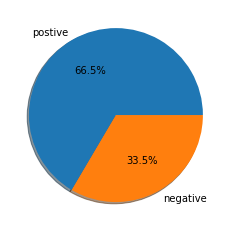

In [214]:
# The percentage for postive songs and negative title
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

pie_labels='postive','negative'
plt.pie([pos,neg],labels=pie_labels,autopct='%1.1f%%',shadow=True)

plt.show()

In [215]:
df_reviews['sentiment']= result_co

In [216]:
df_reviews

,Review main body,char_count,word_count,sentiment
0,first public number ___ welcome attention use ...,368,56,Positive
1,design tv series morphological change real wor...,408,76,Positive
2,father father beings originally wow net flight...,453,84,Negative
3,reading biggest question people man highlighte...,435,79,Negative
4,example lets talk plot scenery see drama hands...,452,83,Positive
...,...,...,...,...
1113,_____ total nine episodes first quarter readin...,426,78,Positive
1116,maybe look forward much drama really like dram...,388,73,Positive
1117,plot dragged several lenses antiswift logic se...,417,74,Positive
1118,squidgame director hwangdonghyuk story introdu...,446,69,Positive


In [217]:
b = df_reviews['sentiment'].value_counts()
print (b)

Positive    550
Negative    114
Name: sentiment, dtype: int64


In [218]:
pos_co = 550
neg_co = 114

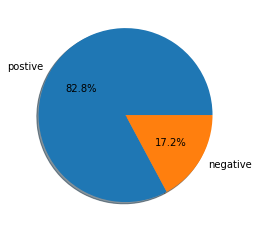

In [219]:
# The percentage for postive songs and negative title
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

pie_labels='postive','negative'
plt.pie([pos_co,neg_co],labels=pie_labels,autopct='%1.1f%%',shadow=True)

plt.show()

In [220]:
#gapminder_China = gapminder[gapminder['country'] == 'China']
df_titles_pos = df_titles[df_titles['sentiment'] == 'Positive']

In [221]:
df_titles_pos

,Commental title,char_count,word_count,sentiment
0,space symbol metaphor analysis social rules co...,98,15,Positive
6,first 8 episodes exciting 9th episode doramen,73,13,Positive
8,far ordinary people evil,50,9,Positive
9,words plagiarism,39,7,Positive
10,latcoma desire theory,38,6,Positive
...,...,...,...,...
1111,bit depression reading,35,6,Positive
1113,mens confusion humanity __,30,4,Positive
1114,bloody reality,14,2,Positive
1117,details disclose distort,24,3,Positive


In [222]:
df_titles_neg = df_titles[df_titles['sentiment'] == 'Negative']

In [223]:
df_titles_neg

,Commental title,char_count,word_count,sentiment
1,hate reasonable comments,32,5,Negative
2,gambling horses dont work old know good father,75,18,Negative
3,man father fake bad selfknowledge,63,12,Negative
4,kong liu fan li zheng slaughtered result ear f...,68,13,Negative
5,discover,8,1,Negative
...,...,...,...,...
1110,advantage basically finished play five stars t...,97,16,Negative
1112,humor obaw,13,3,Negative
1115,poster,6,1,Negative
1116,looking forward bigger bigger disappointment,50,6,Negative


In [224]:
string_neg_ti = ' '.join(df_titles_neg['Commental title'])
string_neg_ti

'hate reasonable comments gambling horses dont work old know good father man father fake bad selfknowledge kong liu fan li zheng slaughtered result ear fan unwaken discover want take little bad makeup successful entry mens looks frown curious necessary directly escape model may saved drama survival like amazing disappointment also believe people three conjectures games dont take life play impossible china dont say city camera check drunk driving evening let red clothes coma cartoon still talk participate sorry havent seen disgusting men long time ___ __ kong liu opened killing big coffee cloud gathered competition korean drama broke plot bug dont know look smile point slot point 456 iq second quarter 456 iq second quarter maybe still kind underlying drama good dont expect second season 456 1 intertwined two virtual conversions much persuade amazing opening boring end survival circuit weak humanity falls quarter one two wood people ridiculous people music plot shameless good china cant 

In [225]:
string_pos_ti = ' '.join(df_titles_pos['Commental title'])
string_pos_ti

'space symbol metaphor analysis social rules concentrated human nature first 8 episodes exciting 9th episode doramen far ordinary people evil words plagiarism latcoma desire theory head greater content treatment time world world net fly finally   dating method children adults color symbols games severe spoiler cautious reality hell big escape long mens story live episodes backbound second episode exposes ending protagonist personal guess directors intention humanity decrypt red man organization micro _ 5 sentences summary drama director tell us childlike hell net brush screen 19 banned new drama saw adrenaline madness kind gas notes strongest drama eightcharacter analysis murderous hidden corners including spoiler always bold korean drama also played young  real inner roll country bottom interest film review human nature questions feelings games outcomes seem destined end may little bit marketing brief discussion summary exposing basten line childrens liver hhhhhh see american tuhanda 

In [226]:
lst_neg_ti = string_neg_ti .split()

In [227]:
lst_pos_ti = string_pos_ti .split()

In [228]:
srs_neg_ti = pd.Series(lst_neg_ti )

In [229]:
srs_pos_ti = pd.Series(lst_pos_ti )

In [230]:
srs_neg_ti.value_counts()

dont         35
people       22
cant         19
good         18
man          16
             ..
devil         1
pit           1
quotation     1
low           1
job           1
Length: 782, dtype: int64

In [231]:
# common word screening (can determine to remove these words or not)
freq_common_neg_ti = srs_neg_ti.value_counts()[:20]
freq_common_neg_ti

dont        35
people      22
cant        19
good        18
man         16
want        14
think       14
games       13
life        13
bad         12
write       10
drama        9
play         9
one          9
high         9
film         9
much         8
poor         8
boss         7
humanity     7
dtype: int64

In [232]:
srs_pos_ti.value_counts()

drama        53
human        39
humanity     36
people       34
good         34
             ..
national      1
household     1
liability     1
ratio         1
distort       1
Length: 1217, dtype: int64

In [233]:
# common word screening (can determine to remove these words or not)
freq_common_pos_ti = srs_pos_ti.value_counts()[:20]
freq_common_pos_ti

drama       53
human       39
humanity    36
people      34
good        34
life        31
male        26
korean      24
nature      20
world       18
film        17
evil        17
games       16
man         16
see         16
escape      15
want        14
little      12
big         12
one         12
dtype: int64

In [234]:
df_reviews_pos = df_reviews[df_reviews['sentiment'] == 'Positive']
df_reviews_neg = df_reviews[df_reviews['sentiment'] == 'Negative']

In [235]:
df_reviews_pos

,Review main body,char_count,word_count,sentiment
0,first public number ___ welcome attention use ...,368,56,Positive
1,design tv series morphological change real wor...,408,76,Positive
4,example lets talk plot scenery see drama hands...,452,83,Positive
7,discussing seem known yen 4 stars 5 stars dont...,378,77,Positive
8,recently korean drama become explosive drama b...,391,62,Positive
...,...,...,...,...
1113,_____ total nine episodes first quarter readin...,426,78,Positive
1116,maybe look forward much drama really like dram...,388,73,Positive
1117,plot dragged several lenses antiswift logic se...,417,74,Positive
1118,squidgame director hwangdonghyuk story introdu...,446,69,Positive


In [236]:
df_reviews_neg

,Review main body,char_count,word_count,sentiment
2,father father beings originally wow net flight...,453,84,Negative
3,reading biggest question people man highlighte...,435,79,Negative
5,sake fair cant announce content advance come t...,279,61,Negative
6,whole drama still cool says imperfect places 1...,383,75,Negative
19,suspense left polices brother seeing list cert...,409,85,Negative
...,...,...,...,...
1038,eat make money eat bankrupt looking rich women...,491,100,Negative
1039,friends finished came spit drama following inv...,424,77,Negative
1041,saw someone saying man real humanity humanity ...,428,82,Negative
1081,reading afternoon time whole worth 7 points st...,387,73,Negative


In [237]:
string_neg_re = ' '.join(df_reviews_neg['Review main body'])
string_pos_re = ' '.join(df_reviews_pos['Review main body'])

In [238]:
lst_neg_re = string_neg_re .split()
lst_pos_re = string_pos_re .split()

In [239]:
srs_neg_re = pd.Series(lst_neg_re )
srs_pos_re = pd.Series(lst_pos_re )

In [240]:
srs_neg_re.value_counts()

_            102
people        77
dont          62
also          36
first         35
            ... 
bridges        1
analysis       1
algorithm      1
15             1
caves          1
Length: 1679, dtype: int64

In [241]:
srs_pos_re.value_counts()

people        379
drama         297
_             263
first         173
also          140
             ... 
likely          1
month           1
82              1
harvesting      1
conveyed        1
Length: 4330, dtype: int64

In [242]:
freq_common_neg_re = srs_neg_re.value_counts()[:20]
freq_common_neg_re

_          102
people      77
dont        62
also        36
first       35
good        33
cant        31
male        30
man         29
drama       28
say         27
old         25
like        24
__          24
big         23
1           22
korea       22
episode     22
see         22
south       21
dtype: int64

In [244]:
freq_common_pos_re = srs_pos_re.value_counts()[:20]
freq_common_pos_re

people    379
drama     297
_         263
first     173
also      140
good      135
male      125
games     124
one       119
man       116
korean    113
really    112
life      103
dont      102
big       101
see       101
still      99
like       98
old        95
two        94
dtype: int64

In [245]:
df_reviews_pos.to_csv('Postive douban reviews.csv')

In [246]:
df_reviews_neg.to_csv('Negative douban reviews.csv')

In [247]:
df_titles_pos.to_csv('Postive douban title.csv')

In [248]:
df_titles_neg.to_csv('Negative douban title_update.csv')

In [5]:
pip install pandas


     |████████████████████████████████| 11.4 MB 15.7 MB/s eta 0:00:01   |█████                           | 1.8 MB 5.1 MB/s eta 0:00:02
     |████████████████████████████████| 503 kB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 16.9 MB 6.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
